In [424]:
import numpy as np
from sklearn import neural_network
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.metrics import classification_report
import sklearn.linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

In [425]:
def generate_data(n):

    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)

    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    data = np.concatenate((temp1,temp2),axis = 0)

    #permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices,:]

    return data


In [426]:
def plot_KNN(KNN_model, X, y):

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),np.arange(x2_min, x2_max, 0.01))

    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu',edgecolor='white', label = 'train')

In [427]:
np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)

## <b>Zadatak 2</b>

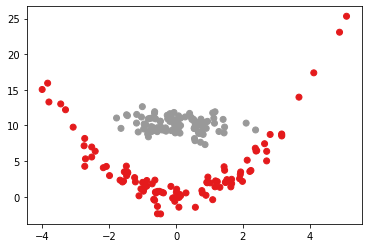

In [428]:
plt.scatter(data_train[:, 0], data_train[:, 1], c=data_train[:,2], cmap=plt.cm.Set1)

## <b> Zadatak 3 </b>

In [429]:
logistic_model = lm.LogisticRegression()
logistic_model.fit(data_train[:,:-1], data_train[:,2])
y_test_predict_lm= logistic_model.predict(data_test[:,:-1])

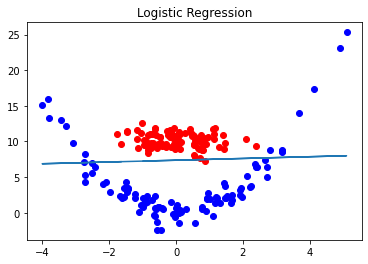

In [430]:
plt.figure()
for i in range (0,len(data_train)):
    if(data_train[i,2]) == 0:
        color="blue"
    else:
        color="red"
    plt.scatter(data_train[i,0],data_train[i,1],c=color, zorder=2)
    
X2=-(model.intercept_ + model.coef_[0,0]*data_train[:,0])/model.coef_[0,1]
plt.plot(data_train[:,0],X2)
plt.title("Logistic Regression")
plt.show()

## <b>Zadatak 4 </b>

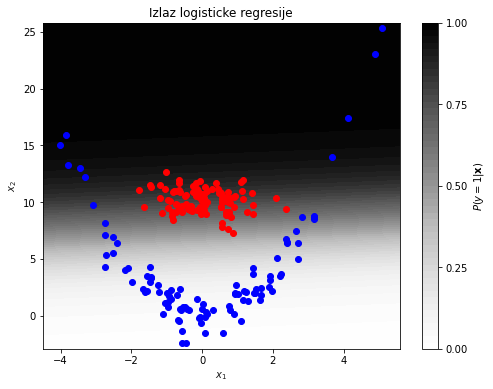

In [431]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data_train[:,0])-0.5:max(data_train[:,0])+0.5:.05, min(data_train[:,1])-0.5:max(data_train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]


for i in range (0,len(data_train)):
    if(data_train[i,2]) == 0:
        color="blue"
    else:
        color="red"
    ax.scatter(data_train[i,0],data_train[i,1],c=color, zorder=2)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

## <b> Zadatak 5 </b>

Text(0, 0.5, 'x2')

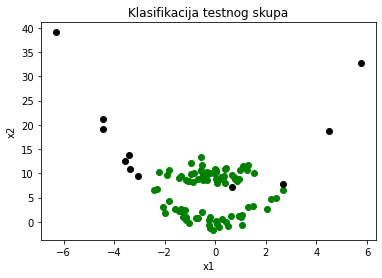

In [432]:
y_predict=model.predict(data_test[:,:-1])

plt.figure()
for i in range (0,len(data_test)):
    if(data_test[i,2]) == y_predict[i]:
        color="green"
    else:
        color="black"
    plt.scatter(data_test[i,0],data_test[i,1],c=color)
plt.title('Klasifikacija testnog skupa')
plt.xlabel('x1')
plt.ylabel('x2')

## <b> Zadatak 6 </b>

In [433]:
def plot_confusion_matrix(c_matrix):

    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x),horizontalalignment='center',verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

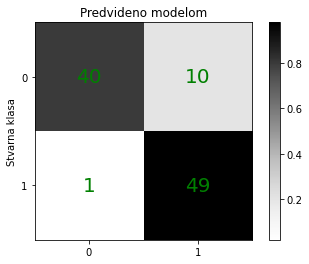

In [434]:
matrix=sm.confusion_matrix(data_test[:,2],y_predict[:])
plot_confusion_matrix(matrix)

In [435]:
TP=float(matrix[0,0])
TN=float(matrix[1,1])
FP=float(matrix[0,1])
FN=float(matrix[1,0])

In [436]:
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
missclasification_rate=(1-accuracy/100)*100
precision=TP/(TP+FP)*100
sensitivity=TP/(TP+FN)*100
specificity=TN/(TN+FP)*100

In [441]:
print("Accuracy: " + str(accuracy))
print("Missclasification: " + str(missclasification_rate))
print("Precision: " + str(precision))
print("Sensitivity: " + str(sensitivity))
print("Specificity: " + str(specificity))

Accuracy: 89.0
Missclasification: 10.999999999999998
Precision: 80.0
Sensitivity: 97.5609756097561
Specificity: 83.05084745762711


In [442]:
## <b>Zadatak 8</b>

<ipython-input-426-fe7b4e33a4f6>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)


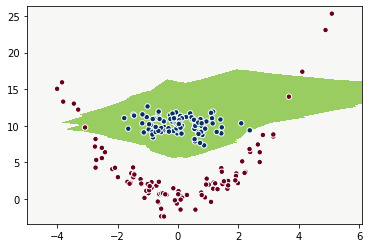

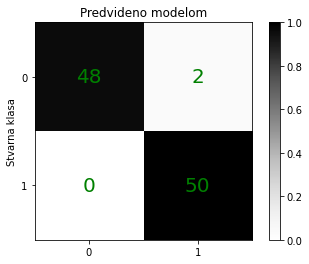

In [438]:
preprocessing.scale(data_train[:,:-1])

modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(data_train[:,:-1], data_train[:,2])

plot_KNN(modelknn,data_train[:,:-1], data_train[:,2])

y_predict1= modelknn.predict(data_test[:,:-1])
matrix1=sm.confusion_matrix(data_test[:,2],y_predict1[:])
plot_confusion_matrix(matrix1)